<a href="https://colab.research.google.com/github/oscar221307/PROCESAMIENTO/blob/main/Laboratorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

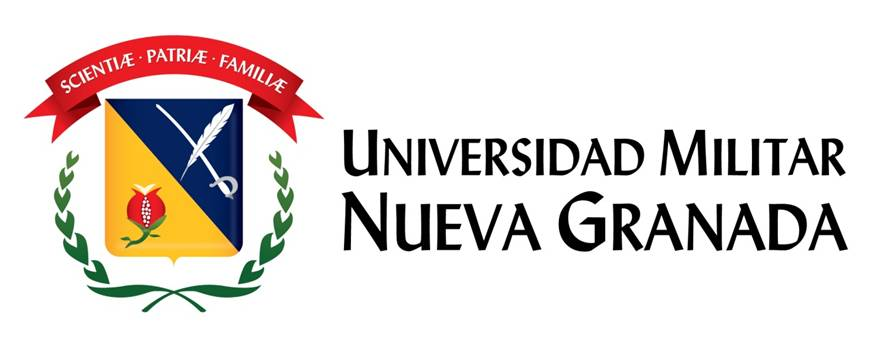


**Informe #02, “ Análisis de Frecuencias de Señales de Voz-Plan Coctel”**

Lauren Blanco, Sofía Suárez – 5600585 (est.lauren.blanco@unimilitar.edu.co)

Oscar Acero, David Sarmiento – 5600602(est.oscar.acero@unimilitar.edu.co)

Laboratorio de Procesamiento Digítal de Señales

Doc. Andrea Carolina Corredor Bedoya

13 Septiembre 2024

---



**1.	Resumen:**A lo largo del desarrollo práctico el presente laboratorio,busca aislar una voz específica en un entorno ruidoso con múltiples hablantes, emulando el problema de la "fiesta de cóctel". A través de un arreglo de micrófonos y técnicas de separación de fuentes ciegas, que lograron ser capturadas y analizadas mediante las señales de audio mezcladas, aplicando algoritmos para desenredar las voces entrelazadas y extraer la voz deseada con la mayor claridad posible,que seran importantes para evaluar la eficacia del método de separación, la relación de señal- ruido (SNR) y los diferentes enfoques claves como el número de micrófonos y la ubicación de las fuentes.

**Palabras Claves:** Aislamiento de señal, Análisis acústico, Arreglo de micrófonos, Beamforming, Captura de señales mezcladas, Extracción de voz, ICA (Análisis de componentes independientes), Procesamiento de señales, Relación señal-ruido (SNR), Separación de fuentes, Sistema de adquisición, Técnicas BSS (Blind Source Separation).

---

**2.Objetivo de la Práctica:** Analizar señales de voz en el dominio de la frecuencia para abordar el problema de la separación de fuentes en un entorno de captura de audio con múltiples hablantes.

---
**3. Procedimiento, Desarrollo y Análisis:**

**3.1 Captura de Señales de Audio en un Entorno Real:**Para la adquisición de las señales de audio, se simuló un escenario de "fiesta de cóctel", donde tres fuentes (personas) conversaban simultáneamente, cada una con un timbre de voz distinto (agudo, grave y normal). Se implementó una configuración triangular de micrófonos, ubicados estratégicamente a distancias equidistantes para garantizar una captura equilibrada del sonido y minimizar la interferencia entre ellos.

Los micrófonos registraron en primer lugar el ruido de fondo presente en el entorno cuando nadie hablaba, como las voces de las fuentes en el ejercicio de simulación, creando una mezcla compleja de señales de audio representativa del escenario planteado.

Cabe destacar que, aunque se intentó realizar una prueba de audio en un espacio de insonorización dentro del laboratorio, se presentaron dificultades técnicas que afectaron la cuantificación precisa de las señales. A pesar de ello, se incluye evidencia del trabajo realizado en clase para ilustrar el proceso y los resultados obtenidos.

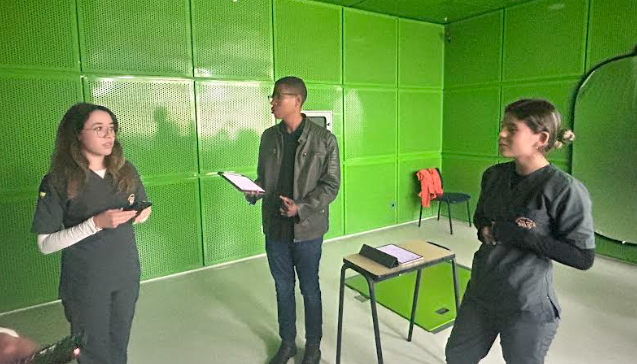

**Figura #01. "Evidencia Trabajo en Clase".Elaboración Propia**

A continuación, se presenta en la siguiente imagen la distribución final de las fuentes sonoras y los micrófonos empleados para recrear el escenario y llevar a cabo la captura de las señales de audio.

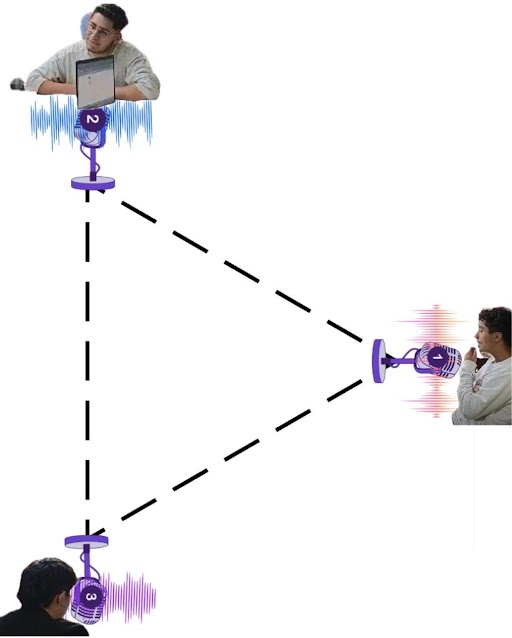


**Figura #02. " Distribución Triangular de Fuentes".Elaboración Propia**


Una vez obtenidas las señales de audio, se exportaron a una carpeta común donde se guardarón todos los documentos necesarios en formato de WAV (formato de audio en forma de onda), como se muestra acontinuación :

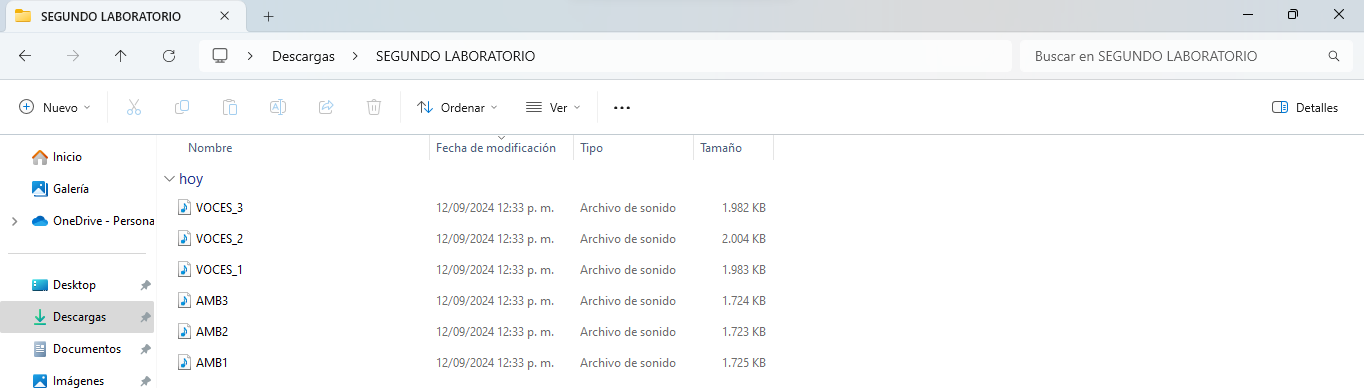

**Figura #03. " Carpeta de audios con formato WAV".  Elaboración Propia.**

**3.2 Importación de Librerias Iniciales:** En este apartado se importan las librerias utilizadas para desarrollar el laboratorio con el fin de extraer señales de audio individuales a partir de una mezcla, mejorando la inteligibilidad y la calidad del audio en entornos ruidosos.

La función de las librerias para el desarrollo de este laboratorio seaplican de la siguiente manera:

*  **Librosa:** Es una biblioteca fundamental para el análisis y manipulación de audio en Python, que proporciona herramientas para cargar, visualizar y transformar señales de audio.
*  **Numpy:** El paquete esencial para computación numérica en Python, que permite realizar operaciones matemáticas eficientes en matrices y arreglos.
*   **Matplotlib.pyplot:** Es una biblioteca estándar para crear visualizaciones en este caso es escencial para graficar cada una de las señales de audio.
*  **sklearn.decomposition.FastICA:** Implementa el algoritmo de Análisis de Componentes Independientes (ICA), para separar fuentes de audio mezcladas asumiendo que son estadísticamente independientes.
*   **soundfile:** Permite leer y escribir una variedad de formatos de archivos de audio de manera sencilla.
*   **scipy.signal:** Proporciona funciones para el diseño y aplicación de filtros, especificamente el pasabandas de tipo Butterworth.

*   **pyroomacoustics.Beamformer:** Implementa técnicas de beamforming, que permiten enfocar la captura de audio en una dirección específica, mejorando la relación señal-ruido y facilitando la separación de fuentes.






In [ ]:
#importación de las librerias
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
import soundfile as sf
from scipy.signal import butter, lfilter
!pip install pyroomacoustics
from pyroomacoustics import Beamformer
!pip install colorama
from colorama import Fore, init #Colores
from scipy.signal import stft, istft
import scipy.signal as signal

**3.3 Condiciones Iniciales:** En esta sección, se detallarán las condiciones iniciales y los parámetros técnicos empleados durante la captura de las señales de audio y el desarrollo adecuado de técnicas de procesamiento para comprender el contexto en el que se realizó el experimento.

**3.3.1 Frecuencia de Muestreo**: Oppenheim,en su libro "Procesamiento de señales en tiempo discreto" describe que la frecuencia de muestreo, representa la cantidad de muestras de una señal que se toma por segundo, esta expresada en hercios (Hz).

La fórmula general para calcular  la frecuencia de muestreo es:

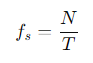

Donde:
* fs es la frecuencia de muestreo (Hz).
* 𝑁 es el número total de muestras tomadas.
* 𝑇 es la duración total de la señal (en segundos).

Con lo anterior, mediante el teorema de Nyquist la frecuencia de muestreo debe ser al menos el doble de la frecuencia más alta presente en la señal original. En el caso del audio audible, el rango de frecuencias que el oído humano puede percibir se extiende aproximadamente desde 20 Hz hasta 20.000 Hz. Por lo tanto, según el teorema de Nyquist, una frecuencia de muestreo de al menos 40.000 Hz sería necesaria para capturar todo el espectro audible.

**¿Qué representa la Selección la Frecuencia a 44.100 Hz?**

Se seleccionó una frecuencia de muestreo de 44,100 Hz para la grabación, ya que se utilizaron equipos de la marca Apple, cuya configuración predeterminada en sus dispositivos de audio sigue este estándar.

La selección de esta frecuencia estandar, permite comprobar que se cumple el Teorema de Nyquist ya que 44, 100 Hz es ligeramente superior al doble de la frecuencia máxima audible (20, 000 Hz), lo que garantiza una captura adecuada del espectro de audio perceptible por el oído.

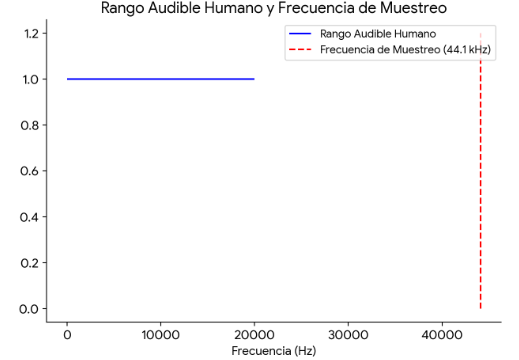

**Figura #04."Relación entre el Rango Audible Humano y la Frecuencia de Muestreo Escogida"**


Con la figura anterior queda más claro la relación, la línea azul representa el rango típico de frecuencias que los humanos pueden escuchar, desde 20 Hz hasta 20 000 Hz y la línea discontinua roja marca la frecuencia de muestreo elegida de 44.100 Hz.

**Comprobación Matemática del Calculo de Nyquist:**

El Teorema de Nyquist establece que:

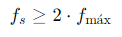

Donde:
* fs es la frecuencia de muestreo.
* 𝑓max es la frecuencia máxima de la señal, en este caso, 20,000 Hz.

Aplicando los valores:

image.png

Como la frecuencia de muestreo seleccionada es     44,100 Hz, que es mayor que 40,000 Hz, se cumple el Teorema de Nyquist, garantizando que se puede capturar el rango completo de frecuencias audibles (hasta 20,000 Hz) sin pérdida de información lo que permite en el laboratorio la captura completa del espectro de las voces humanas, incluso en un entorno ruidoso como lo es la fiesta, por lo que es suficiente para capturar todos los componentes relevantes del habla.

A continuación se presenta de manera indivual, las frecuencias de muestreo del ambiente individual y a su vez la de las voces de cada fuente:

In [ ]:
amb1, amb1_sr = librosa.load('AMB1.wav', sr=44100)
amb2, amb2_sr = librosa.load('AMB2.wav', sr=44100)
amb3, amb3_sr = librosa.load('AMB3.wav', sr=44100)
voces1, voces1_sr = librosa.load('VOCES_1.wav', sr=44100)
voces2, voces2_sr = librosa.load('VOCES_2.wav', sr=44100)
voces3, voces3_sr = librosa.load('VOCES_3.wav', sr=44100)

print(Fore.BLUE +"Frecuencia de muestreo de AMB1:", amb1_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de AMB2:", amb2_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de AMB3:", amb3_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de VOCES_1:", voces1_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de VOCES_2:", voces2_sr, "Hz")
print(Fore.BLUE +"Frecuencia de muestreo de VOCES_3:", voces3_sr, "Hz")

Frecuencia de muestreo de AMB1: 44100 Hz
Frecuencia de muestreo de AMB2: 44100 Hz
Frecuencia de muestreo de AMB3: 44100 Hz
Frecuencia de muestreo de VOCES_1: 44100 Hz
Frecuencia de muestreo de VOCES_2: 44100 Hz
Frecuencia de muestreo de VOCES_3: 44100 Hz


**3.3.2Cálculo de Relación señal-ruido (SNR).**

En este apartado, se evaluará la calidad de la señal
 de audio extraída para cada una de las 3 fuentes. El objetivo es medir la relación señal-ruido (SNR) para cada una ante un ruido ambiente, permitiendo así cuantificar el impacto del ruido en la señal obtenidos mediante la tecnica de SNR.

**¿Qué es la relación señal ruido (SNR)?**

Según Proakis,J.G (2007) en su libro "Digital Signal Processing: Principles, Algorithms, and Applications (4th ed.). Prentice Hall." describe la relacción señal-ruido (SNR) como una medida que compara  el nivel de la señal deseada con el nivel de ruido presente en la señal. Este parametro tiene en cuenta que los niveles altos de un SNR significa que la señal sobresale claramente sobre el ruido y si es bajo  significa que el ruido es comparable o superior a la señal, lo que puede deteriorar significativamente la calidad de la señal.


La fórmula general para calcular el SNR en Decibelios (dB) es:

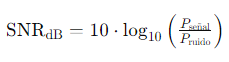

Donde:

* Pseñal es la potencia de la señal.
* Pruido es la potencia del ruido.


Antes de mostrar esta relación de Señal ruido, se va a mostrar la longitud de cada una de las señales.

In [ ]:
amb1, amb1_sr = librosa.load('AMB1.wav', sr=44100)
amb2, amb2_sr = librosa.load('AMB2.wav', sr=44100)
amb3, amb3_sr = librosa.load('AMB3.wav', sr=44100)
voces1, voces1_sr = librosa.load('VOCES_1.wav', sr=44100)
voces2, voces2_sr = librosa.load('VOCES_2.wav', sr=44100)
voces3, voces3_sr = librosa.load('VOCES_3.wav', sr=44100)

print(Fore.GREEN + "Longitud de las Señales Individuales:")
print(Fore.GREEN+ "Longitud de AMB1:", len(amb1))
print("Longitud de AMB2:", len(amb2))
print("Longitud de AMB3:", len(amb3))
print("Longitud de VOCES_1:", len(voces1))
print("Longitud de VOCES_2:", len(voces2))
print("Longitud de VOCES_3:", len(voces3))

Longitud de las Señales Individuales:
Longitud de AMB1: 441434
Longitud de AMB2: 440872
Longitud de AMB3: 441302
Longitud de VOCES_1: 507605
Longitud de VOCES_2: 512772
Longitud de VOCES_3: 507151


Con lo anterior, se muestra el calculo del SNR para cada una de las señales.

In [ ]:
def snrcalculo(señal, ruido):
    pseñal = np.mean(señal ** 2)
    pruido = np.mean(ruido ** 2)
    snr = 10 * np.log10(pseñal / pruido)
    return snr

amb1, amb1_sr = librosa.load('AMB1.wav', sr=44100)
amb2, amb2_sr = librosa.load('AMB2.wav', sr=44100)
amb3, amb3_sr = librosa.load('AMB3.wav', sr=44100)
voces1, voces1_sr = librosa.load('VOCES_1.wav', sr=44100)
voces2, voces2_sr = librosa.load('VOCES_2.wav', sr=44100)
voces3, voces3_sr = librosa.load('VOCES_3.wav', sr=44100)

snr1 = snrcalculo(voces1, amb1)
snr2 = snrcalculo(voces2, amb2)
snr3 = snrcalculo(voces3, amb3)

print(Fore.RED+"SNR1:", snr1, "dB")
print(Fore.RED +"SNR2:", snr2, "dB")
print(Fore.RED +"SNR3:", snr3, "dB")

SNR1: 46.23548984527588 dB
SNR2: 41.50102138519287 dB
SNR3: 42.606587409973145 dB


A continuación, se presentan gráficos que ilustran las señales de audio capturadas por cada micrófono individualmente. Estos gráficos permitirán visualizar las características de las señales mezcladas y apreciar la contribución de cada fuente sonora en la grabación de cada micrófono.

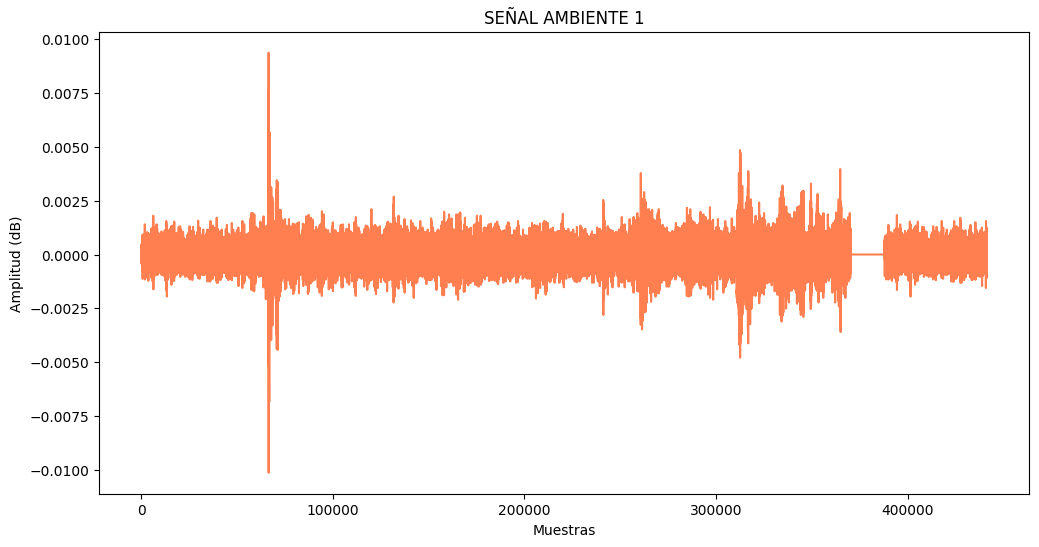

In [ ]:
# Visualiza las señal Ambiente uno Fuente 1

plt.figure(figsize=(12, 6))
plt.title('SEÑAL AMBIENTE 1')
plt.plot(amb1, color='coral')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()


**Figura #05 "Visualización de la Señal de Ambiente Obtenida con la Fuente #01 ". Elaboración Propia**

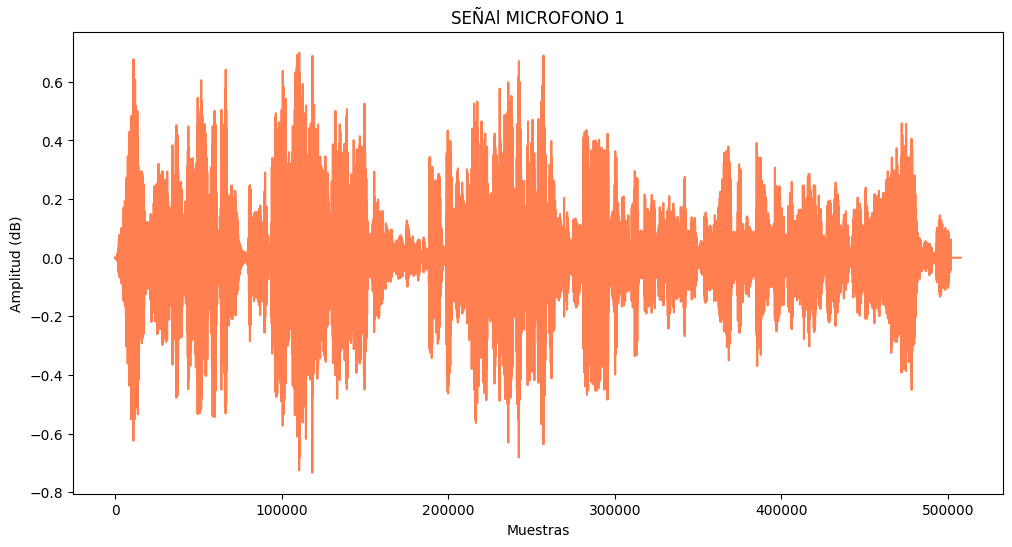

In [ ]:
# Visualiza las señal Microfono con Fuente 1
plt.figure(figsize=(12, 6))
plt.title('SEÑAl MICROFONO 1')
plt.plot(voces1, color='coral')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #06 "Visualización de la Señal del Microfono Obtenida con la Fuente #01 ". Elaboración Propia**

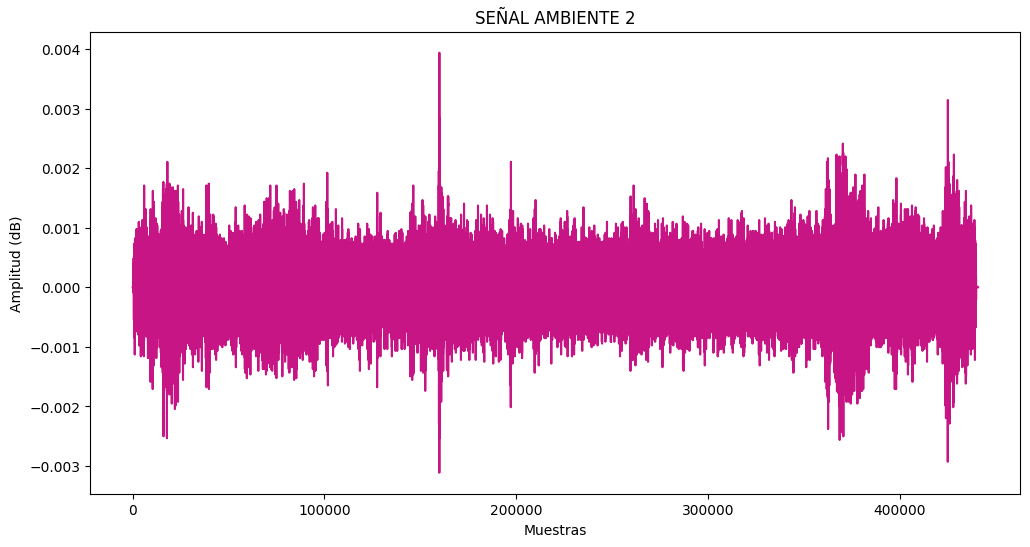

In [ ]:
# Visualiza las señal Ambiente con Fuente 2
plt.figure(figsize=(12, 6))
plt.title('SEÑAL AMBIENTE 2')
plt.plot(amb2, color='mediumVioletRed')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #07 "Visualización de la Señal de Ambiente Obtenida con la Fuente #02 ". Elaboración Propia**

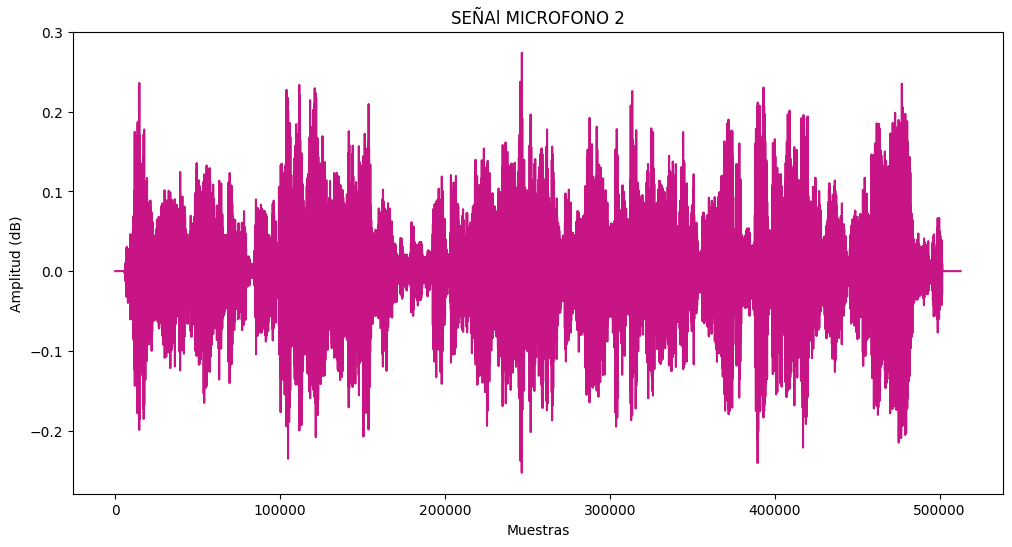

In [ ]:
# Visualiza las señal Microfono con Fuente 2
plt.figure(figsize=(12, 6))
plt.title('SEÑAl MICROFONO 2')
plt.plot(voces2, color='mediumVioletRed')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #08 "Visualización de la Señal del Microfono Obtenida con la Fuente #02 ". Elaboración Propia**

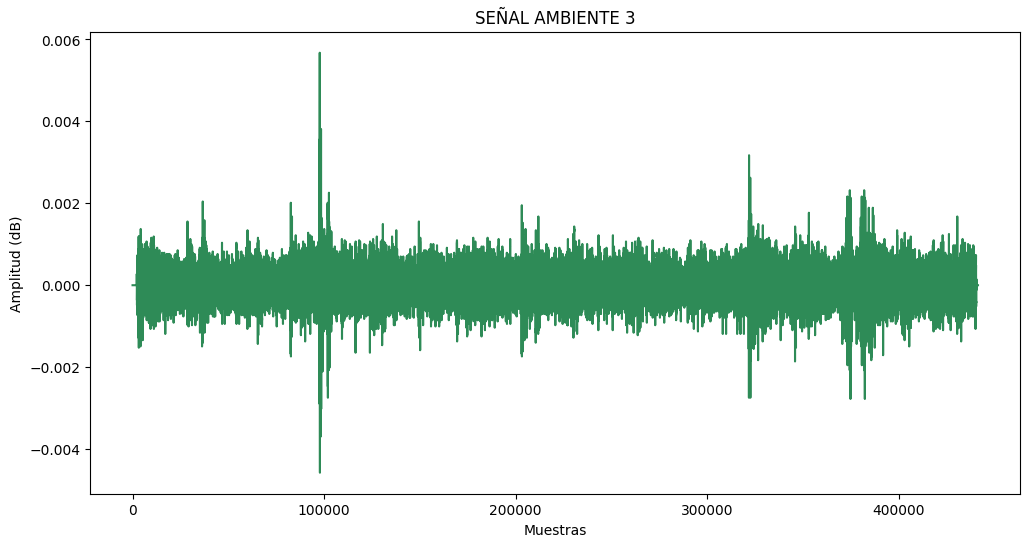

In [ ]:
# Visualiza las señal Ambiente con Fuente 3
plt.figure(figsize=(12, 6))
plt.title('SEÑAL AMBIENTE 3')
plt.plot(amb3, color='SeaGreen')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #09 "Visualización de la Señal de Ambiente Obtenida con la Fuente #03 ". Elaboración Propia**

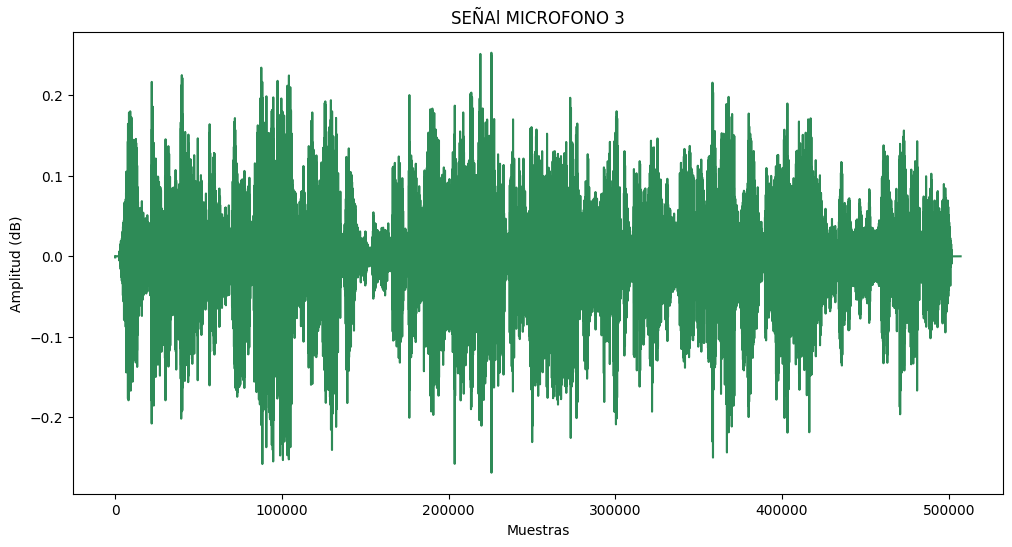

In [ ]:
# Visualiza las señal Microfono con Fuente 3
plt.figure(figsize=(12, 6))
plt.title('SEÑAl MICROFONO 3')
plt.plot(voces3, color='SeaGreen')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (dB)')
plt.show()

**Figura #10 "Visualización de la Señal del Microfono Obtenida con la Fuente #03 ". Elaboración Propia**

**3.3.3 Aplicación de la Transformada Rápida de Fourier**

La Transformada Rápida de Fourier (FFT) es una herramienta esencial en el procesamiento de señales de audio, permitiendo descomponer una señal en el dominio del tiempo en sus componentes de frecuencia. Esta transformación es crucial para analizar y manipular el contenido espectral del audio, lo que resulta fundamental en aplicaciones como la separación de fuentes que es el objetivo principal.

**¿Pero como Funciona la Transformada Rápida de Fourier en el Audio?**

La FFT toma una señal de audio en el dominio del tiempo, que representa la amplitud de la onda sonora en función del tiempo, y la convierte en una representación en el dominio de la frecuencia. Esta representación muestra la intensidad de cada componente de frecuencia presente en la señal original. En otras palabras, la FFT revela qué frecuencias están presentes en el audio y con qué fuerza.

Para el caso de nuestro laboratorio, donde se hacen uso de tres fuentes con distintos timbres de voz (una voz aguda, una grave y una normal), la FFT permitiría identificar los rangos de frecuencias correspondientes a cada voz:

* La voz aguda ocuparía un rango de frecuencias más alto.
* La voz grave estaría en las frecuencias bajas.
* La voz normal podría estar en un rango medio.

Una vez identificados estos rangos, se puede aplicar un filtrado para separar las señales de audio de cada persona.

A continuación,  se muestra el código con el el que se calcula la transformada para cada una de las fuentes, lo que permitira conocer la densidad espectral de potencia (PSD) para cada señal.


En este apartado, se logra entender que el comando **np.fft.fft(voces)** permite calcular la señal de audio almacenada en la voces en una matriz. El resultado,representa los componentes de frecuencia de la señal original.Permitiendo ver qué frecuencias son dominantes en cada señal de audio. Esta información permite distinguir entre diferentes fuentes en función de sus características espectrales únicas.


In [ ]:
# Realizar FFT en cada señal
fft_voces1 = np.fft.fft(voces1)
fft_voces2 = np.fft.fft(voces2)
fft_voces3 = np.fft.fft(voces3)

Con lo anterior,la **densidad espectral de potencia (PSD)** es una herramienta fundamental para separar fuentes del audio mezclada inicialmente.

La PSD describe cómo se distribuye la potencia de una señal en función de la frecuencia. En el caso de las señales de audio capturadas por los micrófonos, la PSD nos mostrará qué frecuencias contienen más energía, lo cual puede ser útil para identificar las características espectrales de cada fuente y asi poder facilitar su separación.

La PSD se calcula sustancialmente utilizando la Transformada de Fourier, Como ya se utilizo el comando anteriormente se toma la Transformada de Fourier de la señal, se calcula su magnitud al cuadrado, y luego se promedia sobre múltiples segmentos de la señal para obtener una estimación más suave y precisa de la PSD.

In [ ]:
# Calcular la densidad espectral de potencia (PSD) para cada señal
psd_voces1 = np.abs(fft_voces1) ** 2
psd_voces2 = np.abs(fft_voces2) ** 2
psd_voces3 = np.abs(fft_voces3) ** 2


Ya sustentado lo anterior, se muestran a continuación las gráficas obtenidas.

* **Gráfica PSD para Voces 1**

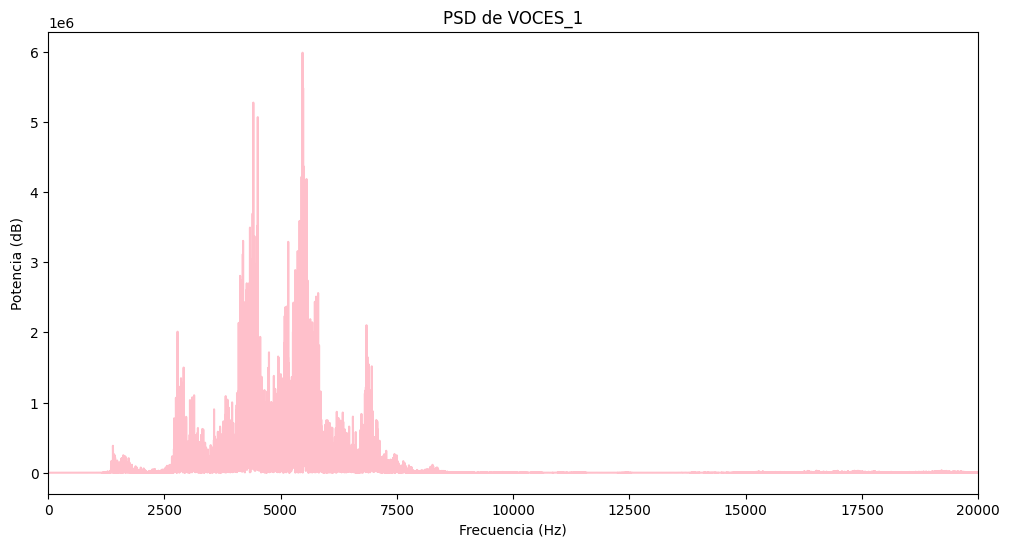

In [ ]:
# Graficar la PSD para voces 1
plt.figure(figsize=(12, 6))
plt.title('PSD de VOCES_1')
plt.plot(psd_voces1, color='pink')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (dB)')
plt.xlim(0, 20000)
plt.show()

**Figura #11. "Análisis de la Densidad Espectral de Potencia de la Señal voces 1". Elaboración Propia**

* **Gráfica PSD para Voces 2**

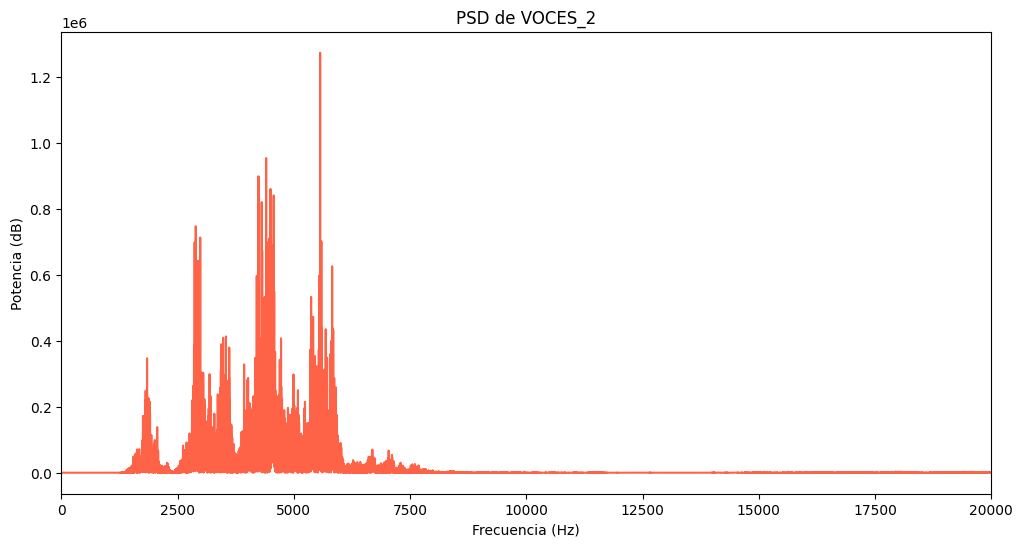

In [ ]:
# Graficar la PSD para voces 2
plt.figure(figsize=(12, 6))
plt.title('PSD de VOCES_2')
plt.plot(psd_voces2, color='tomato')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (dB)')
plt.xlim(0, 20000)
plt.show ()

**Figura #12. "Análisis de la Densidad Espectral de Potencia de la Señal voces 2". Elaboración Propia**

* **Gráfica PSD para Voces 3**

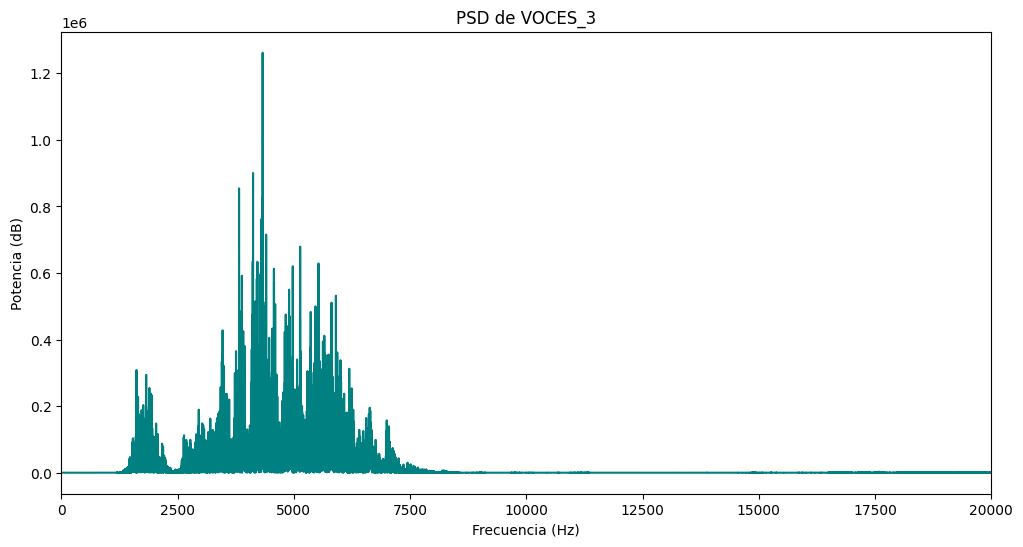

In [ ]:
# Graficar la PSD para voces 3
plt.figure(figsize=(12, 6))
plt.title('PSD de VOCES_3')
plt.plot(psd_voces3, color ='teal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia (dB)')
plt.xlim(0, 20000)
plt.show()

**Figura #13 "Análisis de la Densidad Espectral de Potencia de la Señal voces 3".Elaboración Propia**

Para antes de la aplicación del método, se tuvo en cuenta  un paso a paso para entender los siguientes factores:

* **Igualación de longitudes:** Aseguramos que todas las señales tengan la misma duración utilizando np.padpara rellenar con ceros las señales más cortas. Esto es crucial para alinear correctamente las señales en el tiempo.

* **Creación de la mezcla:** Combinamos las señales en una matriz audio_mix donde cada columna representa un instante de tiempo y cada fila corresponde a un micrófono.

* **Guardado y carga de la mezcla:** Guardamos la mezcla como un archivo WAV y luego la cargamos utilizando librosa para facilitar su procesamiento posterior.

* **Definición de retrasos:** Especificamos los retrasos (en muestras) asociados a cada micrófono en la lista retraso. Es fundamental reemplazar los valores de ejemplo con los retrasos reales que corresponden a la configuración de grabación.

In [ ]:
longitud_max = max(len(voces1), len(voces2), len(voces3))

voces1 = np.pad(voces1, (0, longitud_max - len(voces1)))
voces2 = np.pad(voces2, (0, longitud_max - len(voces2)))
voces3 = np.pad(voces3, (0, longitud_max - len(voces3)))
audio_mix = np.vstack((voces1, voces2, voces3)).T

# Calcular el retraso en función de la distancia entre micrófonos
def calculate_delay(distansias, velocidas, sr):
    return tuple(int(d / velocidas * sr) for d in distansias)

distansias = [0, 0.8, 1.6]
velocidas = 343
delay = calculate_delay(distansias, velocidas, voces1_sr)

**3.3.4 Método de Separación "Beamforming"**
El Beamforming, es una técnica de procesamiento de señales que permite enfocar la recepción o transmisión de energía en una dirección específica, mientras se atenúa el ruido y las interferencias provenientes de otras direcciones. En el contexto de la separación de fuentes de audio, el beamforming se utiliza para "dirigir" un arreglo de micrófonos hacia una fuente sonora de interés, mejorando la relación señal-ruido (SNR) y facilitando la extracción de la señal deseada de una mezcla.

El principio basico del beamforming se basa en la combinación de las señales sonoras capturadas por múltiples micrófonos en nuestro caso los 3 actuadores, aplicando retardos y ponderaciones específicas a cada señal antes de se sumarlas. Estos retardos y ponderaciones se calculan de manera que las señales provenientes de la dirección deseada se refuercen constructivamente, mientras que las señales provenientes de otras direcciones se cancelan o atenúan.

**Ventajas de BeamForming para el Laboratorio:**

* En el entorno planteado del cóctel, el Beamforming permite enfocar la captura de audio hacia una fuente de sonido específica, como un hablante en particular.

* Al reducir la captación de sonidos no deseados, el Beamforming mejora la relación señal-ruido (SNR) de la señal de voz capturada.Esto sirve para visibilizar más las características espectrales de la voz, como formantes, armónicos y variaciones tonales.

A continuación, se muestra el desarrollo del método:

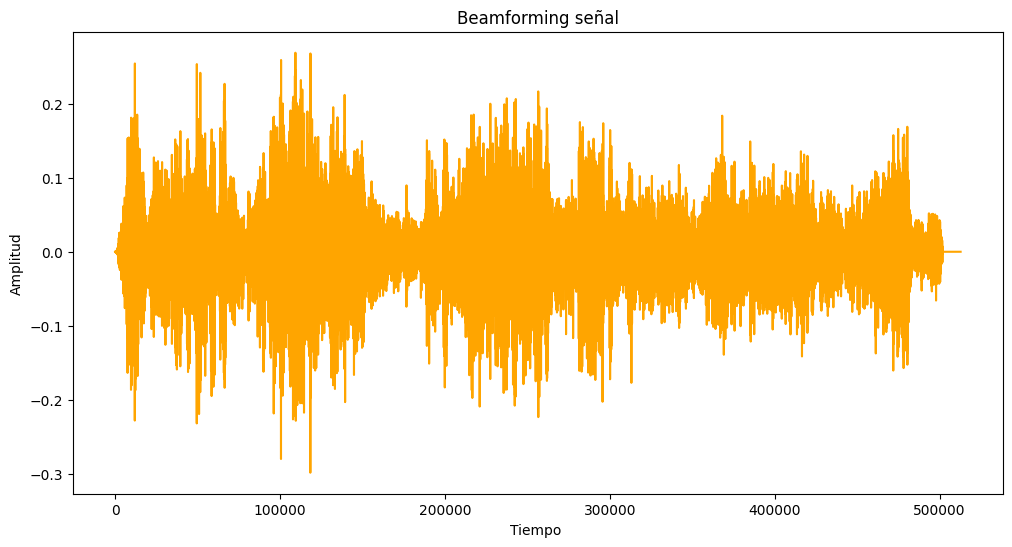

SNR FINAL: 34.95931850246362 dB


In [ ]:
def beamforming(signals, delay):
    num_mics = signals.shape[1]
    beamformed_signal = np.zeros(len(signals))

    for i, delay_i in enumerate(delay):
        beamformed_signal += np.roll(signals[:, i], delay_i)

    return beamformed_signal / num_mics

beamformed_signal = beamforming(audio_mix, delay)

# Escribe la señal formada por haz en un archivo
sf.write('sinal_bonita.wav', beamformed_signal, voces1_sr)

beamformed_signal, voces1_sr = sf.read ('sinal_bonita.wav')

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(beamformed_signal, color='orange')
plt.xlabel('Tiempo ')
plt.ylabel('Amplitud')
plt.title('Beamforming señal')
plt.show()


longitud_max = max(len(amb1), len(amb2), len(amb3))
amb1 = np.pad(amb1, (0, longitud_max - len(amb1)))
amb2 = np.pad(amb2, (0, longitud_max - len(amb2)))
amb3 = np.pad(amb3, (0, longitud_max - len(amb3)))

# Calcular la suma de las tres señales de los micrófonos
señal_suma = amb1 + amb2 + amb3

# Calcular el SNR de la señal beamformed en contra de la suma
SNR_FINAL= snrcalculo(beamformed_signal, señal_suma)
print(Fore.BLUE+ "SNR FINAL:", SNR_FINAL, "dB")

**Figura #14 "Señal Separada con el Método de Separación Beamforming  ".Elaboración Propia**

El valor de **SNR de 34,9593 dB** indica una relación señal/ruido bastante buena. En general, es deseable contar con valores de SNR más altos, ya que significan que la señal deseada es significativamente más fuerte que el ruido de fondo. En el contexto de las señales de audio, una SNR más alta generalmente se traduce en un sonido más limpio y más inteligible.

**4. Análisis de Datos:**

En este laboratorio, se llevó a cabo un experimento utilizando tres micrófonos ubicados de manera aleatoria en una habitación, donde tres personas hablaban simultáneamente. Esto permitió capturar tres fuentes de audio distintas, cada una con una mezcla de las voces y el ruido ambiental presente en la habitación. Posteriormente, el objetivo fue procesar estas señales para analizar las características de las voces, calcular las relaciones señal-ruido (SNR) y aplicar técnicas de beamforming para separar una de las voces, mejorando su claridad en relación con el ruido y las demás voces. El primer paso consistió en calcular el SNR de cada señal captada por los micrófonos. Para ello, se comparó la potencia de las señales de las voces con el ruido de referencia presente en la habitación. Los resultados mostraron que el SNR de cada una de las señales fue positivo siendo valores de 46.2 ,41.5 , y 42.6 , lo que indica que las voces se registraron con suficiente claridad en relación con el ruido ambiente. Este resultado inicial fue clave, ya que un SNR positivo garantiza que las señales de las voces son más potentes que el ruido de fondo, lo que facilita su posterior procesamiento cabe resaltar que la frecuencia de muestreo fue 44.1 Khz. A continuación, se realizó un análisis en el dominio de la frecuencia mediante la aplicación de la Transformada Rápida de Fourier (FFT) a cada una de las señales capturadas por los micrófonos. Este paso permitió descomponer las señales en sus componentes de frecuencia, lo que facilita la identificación de las características espectrales de las voces. Después de la FFT, se calculó la densidad espectral de potencia (PSD), que mide la distribución de la potencia de la señal en función de la frecuencia en este caso para las 3 se observa que las frecuencias llegan a un aproximado de 8000 Hz esto significa que en ese rango se encuentra los sonidos que evidenciaron los micrófonos y totalmente de acuerdo a la voz humana. Esta información es útil para visualizar cómo se distribuye la energía de las voces en diferentes rangos de frecuencias y para diferenciar entre las voces capturadas. Tras obtener la FFT y el PSD, se combinó la información de los tres micrófonos en una señal conjunta que contenía las tres voces superpuestas junto con el ruido ambiental. Esta señal representaba la mezcla de todas las fuentes de sonido presentes en la sala y servía como entrada para el siguiente paso, donde se aplicaría la técnica de beamforming. El beamforming es una técnica utilizada para mejorar la claridad de una fuente sonora en particular mediante la alineación de las señales provenientes de varios micrófonos. En este caso, se aplicó beamforming para enfocar y separar una de las voces, aislándola del resto de las señales. Esto se logró ajustando los tiempos de llegada de las señales a los micrófonos, lo que permite reforzar la voz que se desea extraer mientras se atenúan las demás voces y el ruido ambiental. Una vez obtenida la señal mejorada mediante beamforming, se procedió a calcular nuevamente el SNR, pero esta vez comparando la señal mejorada con las señales originales de los tres micrófonos. Al igual que en los cálculos iniciales, el SNR resultó ser positivo, lo que indica que el proceso de beamforming fue exitoso en la tarea de separar y mejorar la claridad de la voz seleccionada en comparación con la mezcla inicial de ruido.

**1.¿Cómo afecta la posición relativa de los micrófonos y las fuentes sonoras en la efectividad de la separación de señales?**

La posición de los micrófonos y las fuentes sonoras es muy importante para separar señales de audio. Cuánto más separados estén los micrófonos y las fuentes, más fácil será distinguir entre diferentes sonidos porque habrá una mayor diferencia en el tiempo que tarda el sonido en llegar a cada micrófono. Además, los micrófonos tienen patrones de captación que les hacen más sensibles a ciertos sonidos dependiendo de la dirección de donde vienen. Si colocamos los micrófonos de manera estratégica, podemos mejorar la capacidad para captar los sonidos deseados y reducir los no deseados. Elegir bien la ubicación de los micrófonos ayuda a obtener mejor información para separar las fuentes de sonido, como se explica en el libro de Van Trees, Optimum Array Processing (2002).

**2.¿Qué mejoras implementaría en la metodología para obtener mejores resultados?**

Se disponga de instrumentos de mayor precisión para la recolección de las señales sonoras, asegurándose de que las voces sean captadas con la claridad y nitidez debidas. Asimismo, se aconseja la implementación de técnicas avanzadas de separación de fuentes, tales como la división en valores singulares o métodos como ICA, que permitan discernir las señales mezcladas con más exactitud. Además, sería prudente realizar múltiples ensayos en diversas condiciones acústicas, para así obtener un amplio espectro de datos que permita realizar un análisis exhaustivo en frecuencia.

**5. Conclusiones:**


* El método de beamforming demostró ser una técnica valiosa para la separación de señales de voz en un entorno de mezcla. Al dirigir la atención del sistema hacia una dirección específica, se logró mejorar la relación señal-ruido (SNR) y aislar la señal de interés, incluso en presencia de otras fuentes de sonido.

*  La relación señal-ruido (SNR) final se revela como un indicador clave de la calidad de la señal separada. Una SNR alta, como la obtenida en este laboratorio, indica una señal limpia y clara, lo que facilita su posterior procesamiento y análisis. Es fundamental comprender cómo diferentes tipos de ruido afectan la SNR para desarrollar estrategias efectivas de mitigación y mejora de la calidad de la señal.

* El análisis en frecuencia de las señales de voz permitió visualizar y comprender la distribución de la energía en diferentes bandas de frecuencia, lo cual es esencial para la identificación y separación de fuentes sonoras. La capacidad de analizar el espectro de frecuencias, tanto de la señal original como de la señal procesada, proporciona información valiosa sobre la efectividad de las técnicas de separación y permite identificar áreas de mejora.

**6. Recomendaciones:**
1. Primero, para ser compilado asegúrese de que todos los paquetes necesarios estén instalados.Si no en la primera parte del codigo pueden encontrar las librerias necesarias a lo largo del codigo.

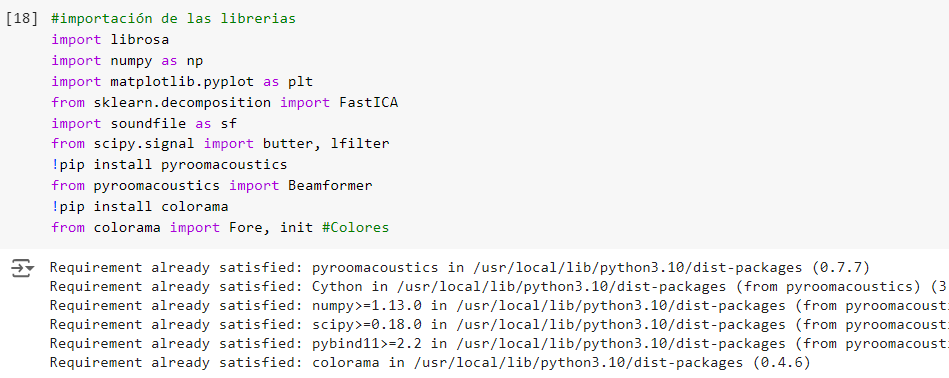

2. Verifique que los Archivos WAV estén en el directorio de trabajo actual o especifica de la ruta completa al archivo.

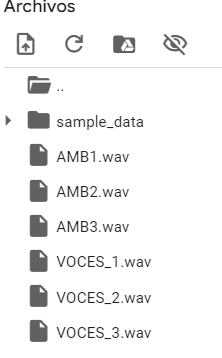

**si usted no cumple con estos  pasos es posible que el codigo no corra por las configuraciones del compilador collab**



**7. Bibliografía:**

[1].Rosal, M. (2021). Sonido digital I.

[2].Proakis, J. G., & Manolakis, D. G. (2007). Digital Signal Processing: Principles, Algorithms, and Applications (4th ed.).

[3].Oppenheim, A. V., Schafer, R. W., & Buck, J. R. (2011). Tratamiento de señales en tiempo discreto.

[4].Cordón Urbiola, D. (2012). Separación de fuentes sonoras armónicas: estudio comparativo.

[5].Di Persia, LE (2017). Separación ciega de fuentes sonoras: revisión histórica y desarrollos recientes.

[6].Heras Rodríguez, MDL (2024). La transformada rápida de Fourier: fundamentos y aplicaciones (Tesis de licenciatura).

[7].González, J., Forero, E., Jiménez, F. y Mariño, I. (2013). Atenuación de rizado en la densidad espectral de potencia calculada en una señal de ritmo cardíaco. Matemática , 11 (2), 22-26.
